# Residency Project Deliverable: 1
# Rutu Shah
# Nischal Joshi
# Murali Krishna
# Santhosh Ramachandran 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [ ]:
df = pd.read_csv('heart_disease_uci.csv')

In [64]:


#explore the dataset
print("Printing head()\n", df.head())
print("Printing describe()\n", df.describe())
print("Printing info()\n", df.info())


Printing head()
    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             norma

In [65]:
# Check for missing values in each column
print(df.isnull)


<bound method DataFrame.isnull of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  Fal

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [66]:
for c in df.columns:
    miss = df[c].isnull().sum()
    print("{} has {} missing value(s)".format(c,miss))

id has 0 missing value(s)
age has 0 missing value(s)
sex has 0 missing value(s)
dataset has 0 missing value(s)
cp has 0 missing value(s)
trestbps has 59 missing value(s)
chol has 30 missing value(s)
fbs has 90 missing value(s)
restecg has 2 missing value(s)
thalch has 55 missing value(s)
exang has 55 missing value(s)
oldpeak has 62 missing value(s)
slope has 309 missing value(s)
ca has 611 missing value(s)
thal has 486 missing value(s)
num has 0 missing value(s)


In [67]:
#Performing data cleaning steps

#Handling missing values

#dropping rows of gender having 1 missing value and family having 2 missing values

df = df.dropna(subset=['slope', 'restecg'])

if df['age'].isnull().sum() > 0:
    df['age'] = df['age'].fillna(method='ffill')
if df['fbs'].isnull().sum() > 0:
    df['fbs'] = df['fbs'].fillna(method='ffill')
if df['thalch'].isnull().sum() > 0:
    df['thalch'] = df['thalch'].fillna(method='ffill')
if df['exang'].isnull().sum() > 0:
    df['exang'] = df['exang'].fillna(method='ffill')
if df['ca'].isnull().sum() > 0:
    df['ca'] = df['ca'].fillna(method='ffill')
if df['thal'].isnull().sum() > 0:
    df['thal'] = df['thal'].fillna(method='ffill')

# If you have columns like 'chol' or 'thalach' with missing — you can fill them too
# Here replacing *example* columns:
if 'chol' in df.columns and df['chol'].isnull().sum() > 0:
    df['chol'] = df['chol'].fillna(method='bfill')
if 'trestbps' in df.columns and df['trestbps'].isnull().sum() > 0:
    df['trestbps'] = df['trestbps'].fillna(method='bfill')
if 'thalach' in df.columns and df['thalach'].isnull().sum() > 0:
    df['thalach'] = df['thalach'].fillna(method='bfill')
if 'oldpeak' in df.columns and df['oldpeak'].isnull().sum() > 0:
    df['oldpeak'] = df['oldpeak'].fillna(method='bfill')
if 'slope' in df.columns and df['slope'].isnull().sum() > 0:
    df['slope'] = df['slope'].fillna(method='bfill')
if 'ca' in df.columns and df['ca'].isnull().sum() > 0:
    df['ca'] = df['ca'].fillna(method='bfill')
if 'thal' in df.columns and df['thal'].isnull().sum() > 0:
    df['thal'] = df['thal'].fillna(method='bfill')


# Check result
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipykernel_36/752498086.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['fbs'] = df['fbs'].fillna(method='ffill')
/tmp/ipykernel_36/752498086.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(method='ffill')
/tmp/ipykernel_36/752498086.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['thalch'] = df['thalch'].fillna(method='ffill')
/tmp/ipykernel_36/752498086.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['exang'] = df['exang'].fillna(method='ffill')

In [68]:
#checking for inconsistent data
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

Duplicate rows found: 0


In [69]:
# Convert numeric columns
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Check inconsistent values
print(df[df['age'] < 0])  # unlikely
print(df[df['chol'] < 0]) # unlikely

Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []
Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []


In [70]:
# Detect noisy age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['age'] >= lower) & (df['age'] <= upper)]

print(f"\nAge IQR Analysis:\nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLower Bound: {lower}\nUpper Bound: {upper}")



Age IQR Analysis:
Q1: 49.0
Q3: 61.0
IQR: 12.0
Lower Bound: 31.0
Upper Bound: 79.0


In [71]:
# Detect noisy cholesterol
if 'chol' in df.columns:
    chol_upper = df['chol'].quantile(0.99)
    df = df[df['chol'] <= chol_upper]
    print(f"Cholesterol upper bound (99th percentile): {chol_upper}")


Cholesterol upper bound (99th percentile): 406.7599999999999


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


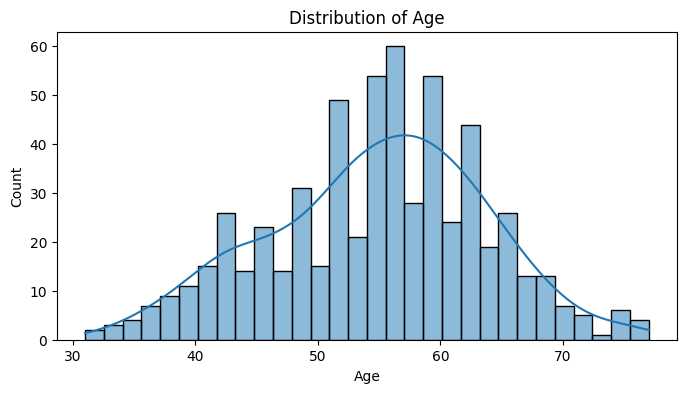

In [72]:
#Exploratory data analysis on Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


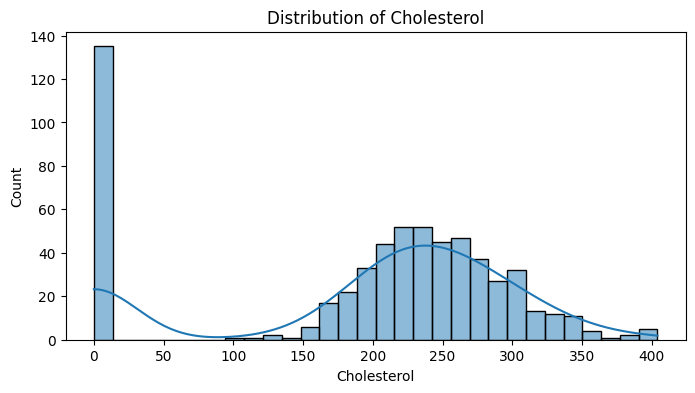

In [73]:
#Exploratory data analysis Cholesterol
if 'chol' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['chol'], bins=30, kde=True)
    plt.title("Distribution of Cholesterol")
    plt.xlabel("Cholesterol")
    plt.ylabel("Count")
    plt.show()

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


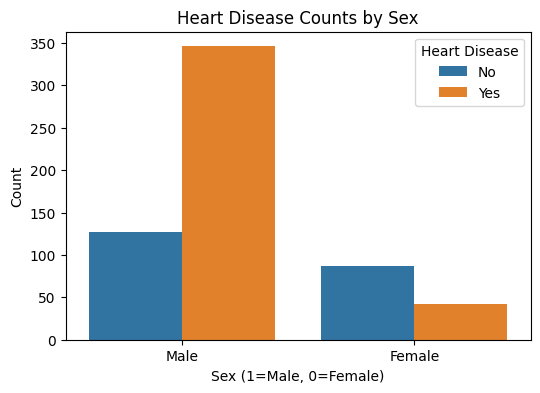

In [74]:
# Checking the target column
print(df.columns)

#renaming it to nu,
if 'target' not in df.columns and 'num' in df.columns:
    df.rename(columns={'num': 'target'}, inplace=True)

#converting to binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Now plot
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease Counts by Sex")
plt.xlabel("Sex (1=Male, 0=Female)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


In [75]:
# Since the data is not all numerical, we need to convert them to labels
# Identify categorical columns (usually dtype == object or string)
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [76]:
numeric_cols

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

In [77]:
categorical_cols

Index(['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal'], dtype='object')

In [78]:
from sklearn.preprocessing import LabelEncoder

#Using LabelEncoder to convert the string values to numeric labels
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [79]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df[df.columns[:15]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [82]:
X.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [83]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1


In [84]:
y.info()

<class 'pandas.core.series.Series'>
Index: 602 entries, 0 to 912
Series name: target
Non-Null Count  Dtype
--------------  -----
602 non-null    int64
dtypes: int64(1)
memory usage: 9.4 KB


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [86]:
X_train[:1]

array([[ 0.50463433, -1.04469943,  0.55048188,  0.03443219, -0.74187335,
        -0.0479166 ,  0.18904384, -0.41926275,  1.84950064, -0.28470281,
         1.10146961, -0.21506243, -0.36430001, -0.65855802, -1.97516053]])

In [87]:
# Choosing different neighbors to test their accuracy 
k_values = [1,5,11,16,19]

In [88]:
np.isnan(X_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [89]:
knn_results = {}

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train KNN models with different k values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_results[k] = accuracy

In [90]:
print("Results of Classification Methods:")
print("KNN:")
for k, accuracy in knn_results.items():
    print(f"k = {k}, Accuracy: {accuracy:.2f}")

Results of Classification Methods:
KNN:
k = 1, Accuracy: 0.81
k = 5, Accuracy: 0.84
k = 11, Accuracy: 0.84
k = 16, Accuracy: 0.84
k = 19, Accuracy: 0.84


Text(0.5, 1.0, 'Accuracy vs k for KNN')

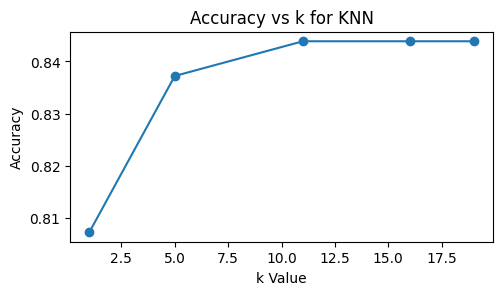

In [91]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(list(knn_results.keys()), list(knn_results.values()), marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for KNN')

## Decision Tree Classification

In [92]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [120]:

classifier_y_pred = classifier.predict(X_test)

In [121]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, classifier_y_pred))
print('Accuracy:', accuracy_score(y_test,classifier_y_pred))

[[ 67  30]
 [ 33 171]]
Accuracy: 0.7906976744186046


In [95]:
# Visualizing the result
from sklearn import tree

text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 0.35
|   |--- feature_14 <= 0.22
|   |   |--- feature_13 <= 1.14
|   |   |   |--- feature_11 <= 0.75
|   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |--- feature_4 <= -0.25
|   |   |   |   |   |   |--- feature_6 <= 1.07
|   |   |   |   |   |   |   |--- feature_1 <= -0.87
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.72
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_6 >  0.72
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  -0.87
|   |   |   |   |   |   |   |   |--- feature_0 <= -0.92
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  -0.92
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 1.37
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_9 >  1.37
|   |   |   |   |   |   |   | 

In [96]:
# Get feature names
feature_names = ['id',
 'age',
 'sex',
 'dataset',
 'chest pain type',
 'resting blood pressure',
 'cholesterol',
 'fasting blood sugar',
 'restecg',
 'max heart rate',
 'excercise induced angina',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 '',]

In [97]:
# Get target name
target_name = list(df.columns[15:])
target_name.append('')
target_name

['target', '']

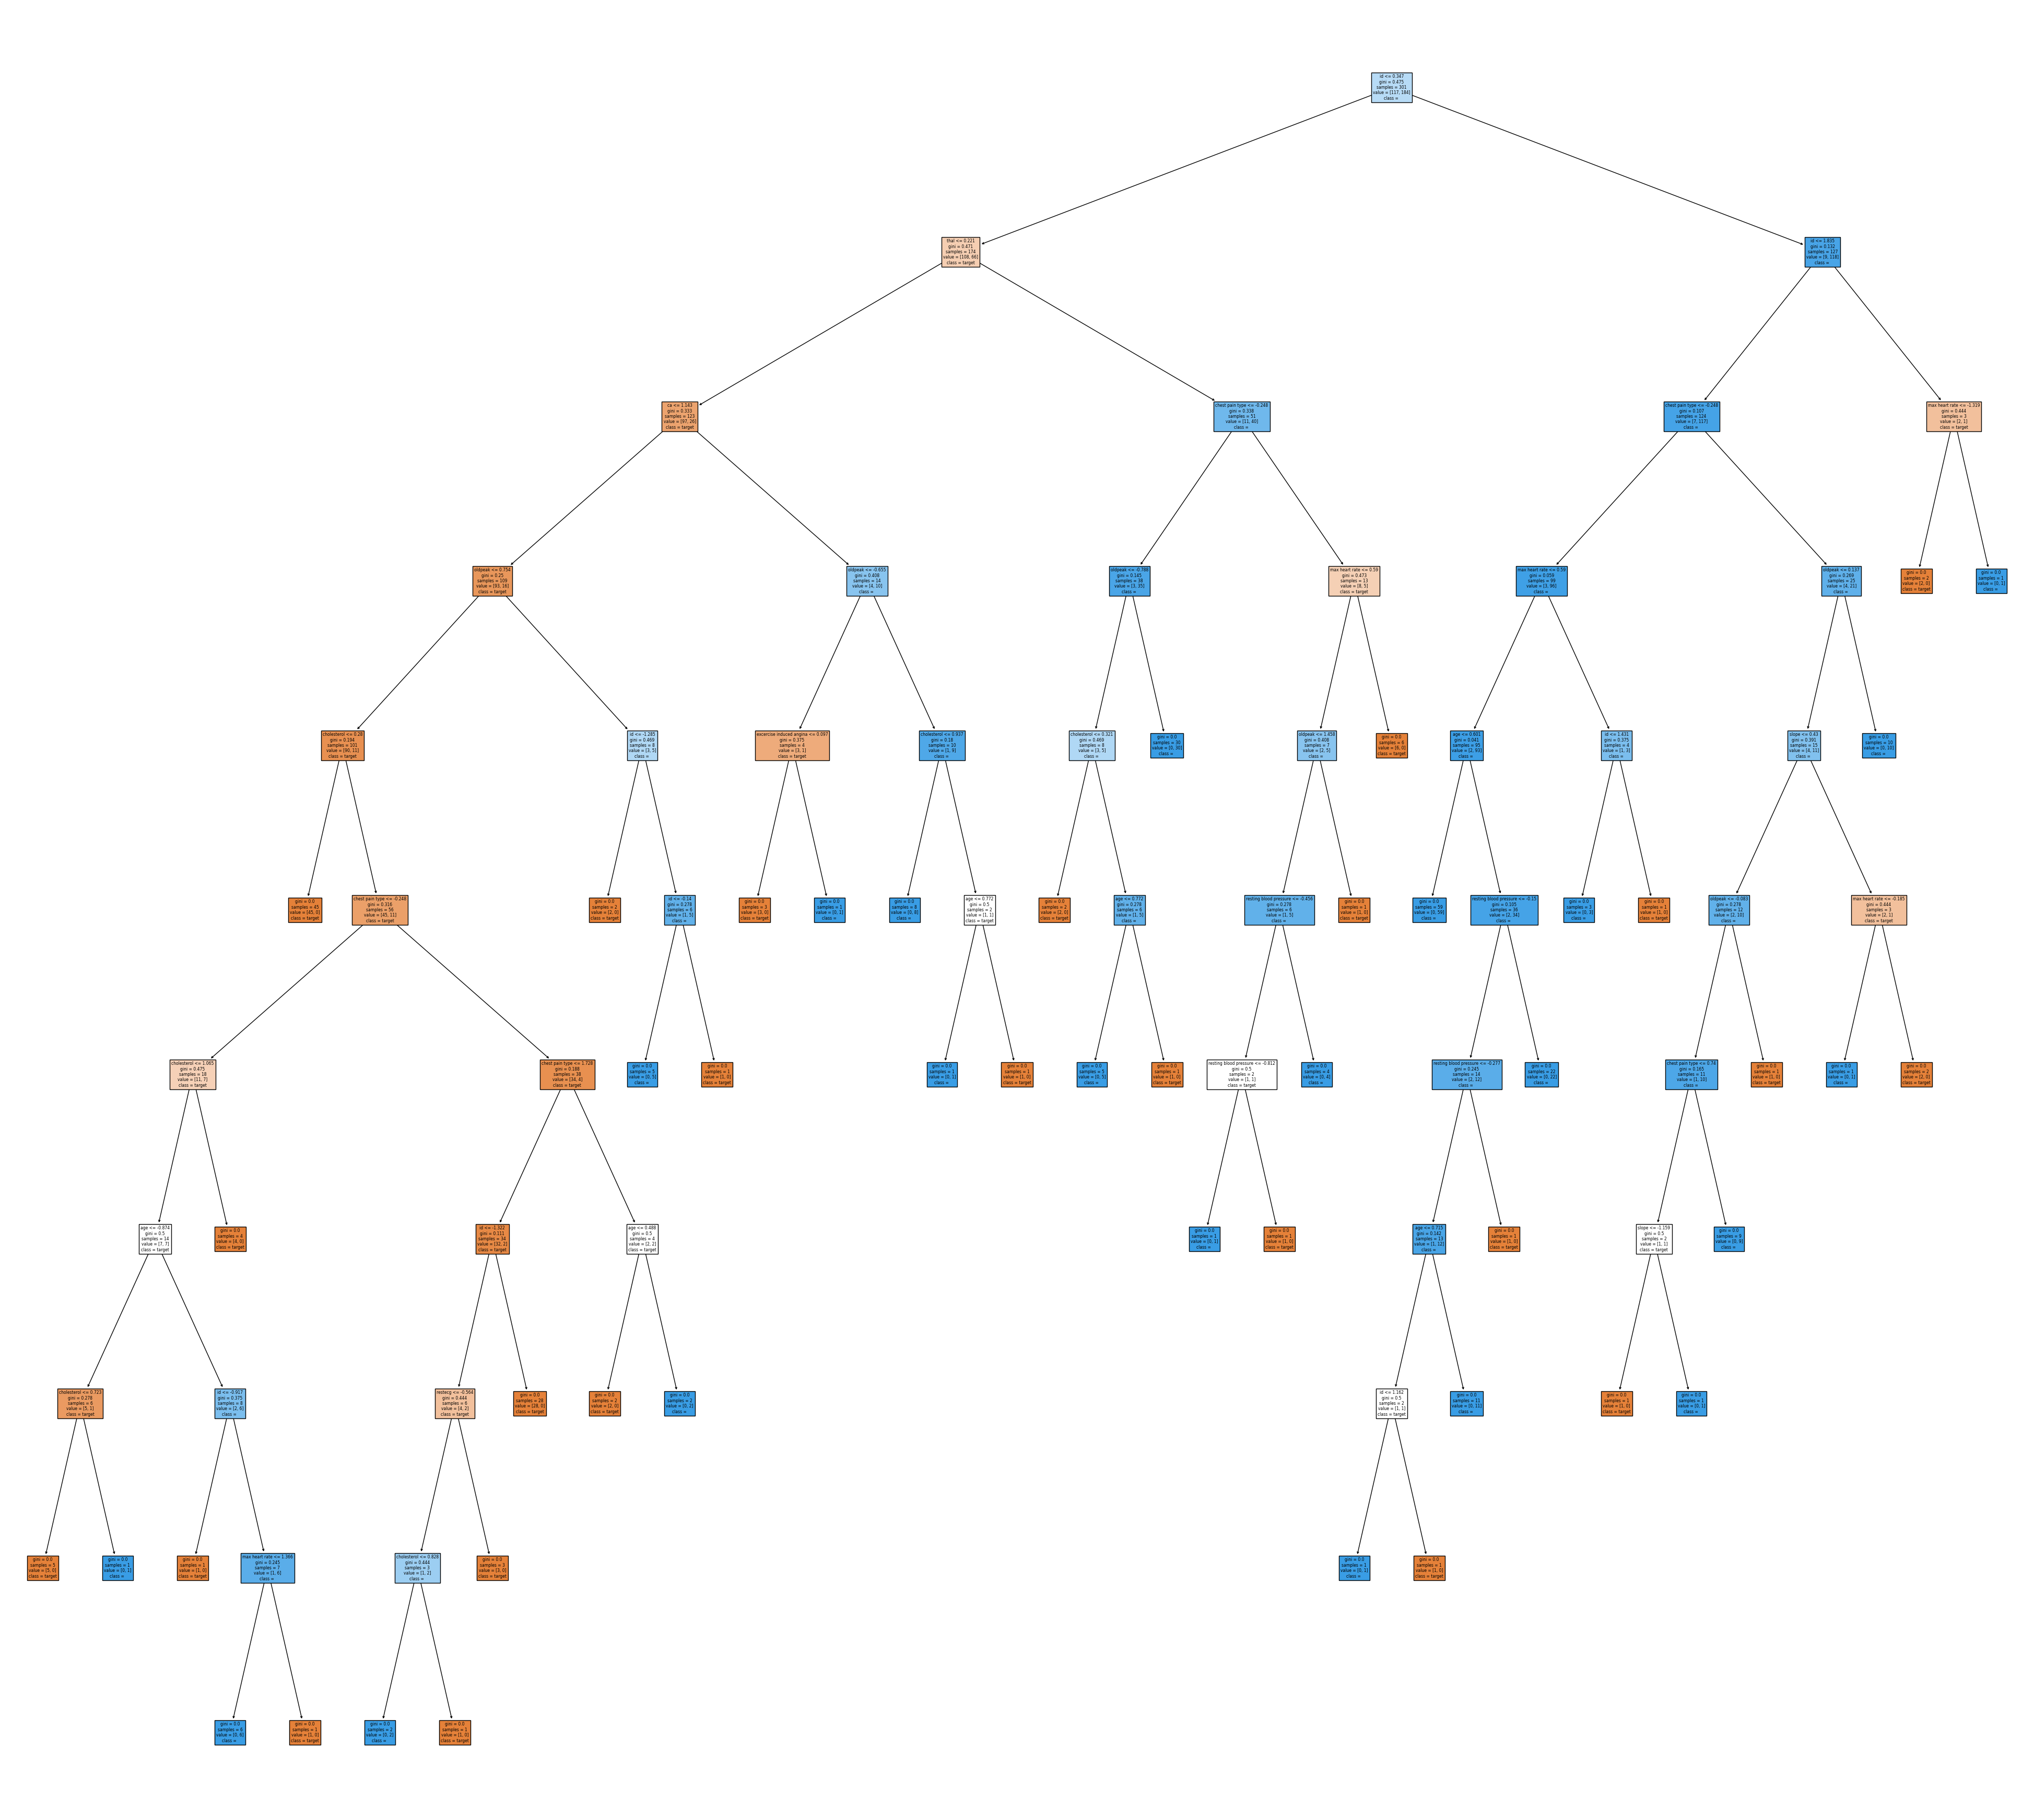

In [98]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(classifier, 
                   feature_names= feature_names, class_names=target_name, filled=True)

### Hyperparameter Tuning - KNN

In [99]:
from sklearn.model_selection import GridSearchCV

## Using GridSearchCV to identify to best performing parameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best score: 0.8772677595628415


### Performance Evaluation - KNN

In [105]:
# Evaluating the classification model performance on the parameters with highest score provided by GridSearchCV
knnModel = KNeighborsClassifier(n_neighbors= 7, weights='distance', metric= 'manhattan')
knnModel.fit(X_train, y_train)
# Predictions
y_pred = knnModel.predict(X_test)
y_proba = knnModel.predict_proba(X_test)[:, 1] 

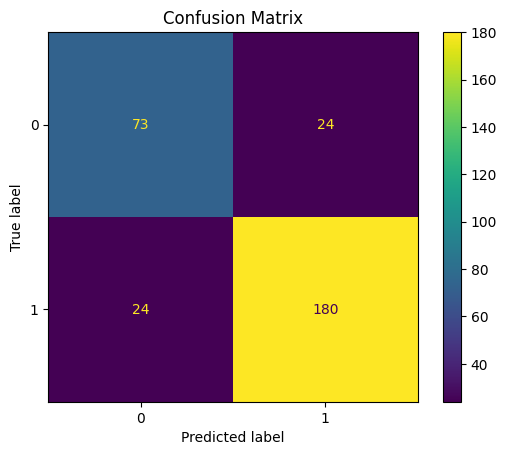

In [107]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [108]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.841
Precision: 0.882
Recall: 0.882
F1 Score: 0.882


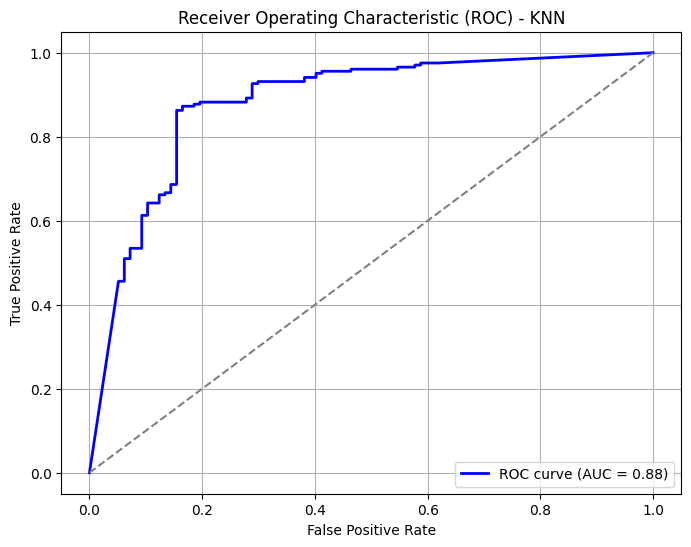

In [111]:
# ROC Curve + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Hyperparameter Tuning - Decision Tree

In [119]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best score: 0.8307650273224045


### Performance Metrics - Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
# Predictions
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]  # Needed for ROC

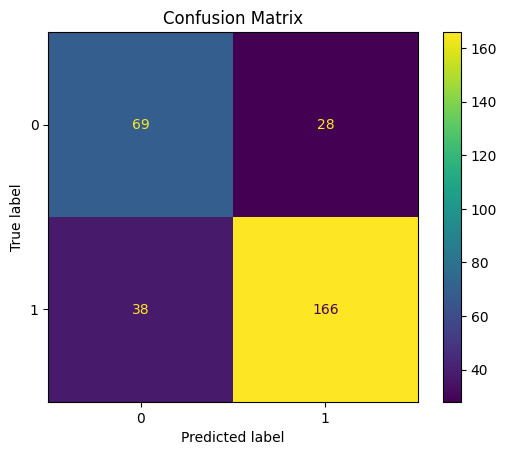

In [123]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [125]:
# Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.781
Precision: 0.856
Recall: 0.814
F1 Score: 0.834


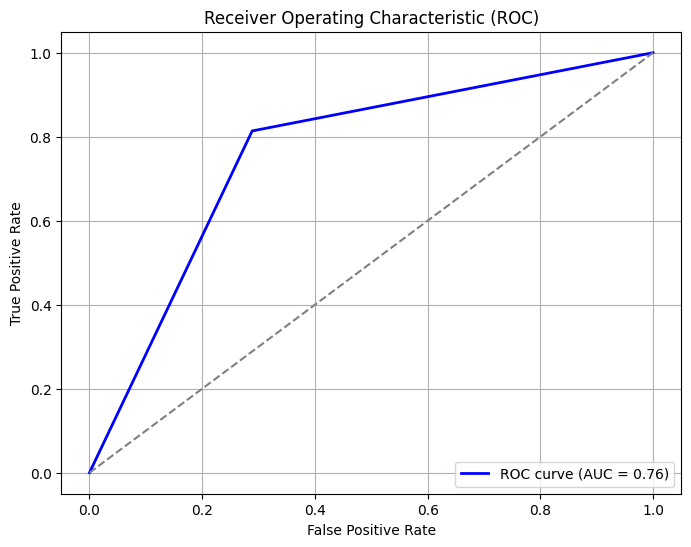

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Clustering

In [130]:
from sklearn.cluster import KMeans

In [128]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [131]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_labels

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,

In [132]:
# Add the cluster labels to the DataFrame for plotting
df['Cluster'] = kmeans_labels

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="Set2")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clusters')
plt.legend()
plt.grid()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>